In [17]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import cross_validation as CV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

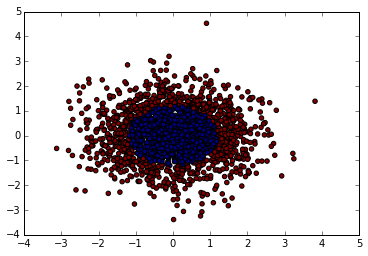

In [11]:
X,Y = make_gaussian_quantiles(n_features=2, n_samples=2000, n_classes=2)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

In [12]:
skf = CV.StratifiedKFold(Y, n_folds=2)

#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])

for train_index, test_index in skf:
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

TRAIN: 1000 TEST: 1000
TRAIN: 1000 TEST: 1000


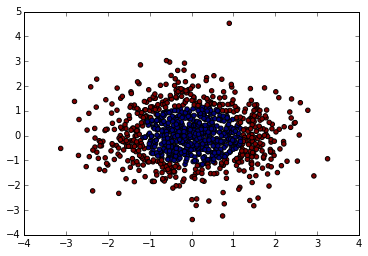

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train)
plt.show()

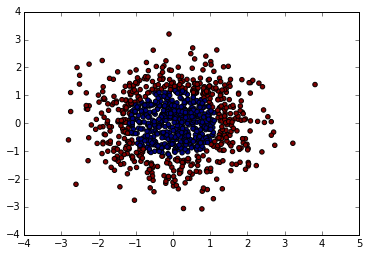

In [14]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test)
plt.show()

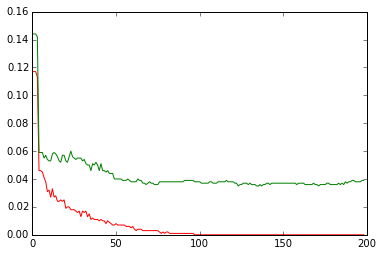

In [16]:
trainscore = list()
testscore = list()

for i in range(1,200):
    clf = GBC(n_estimators=i)  
    clf.fit(X_train, Y_train)
    trainscore.append(1-clf.score(X_train,Y_train))
    testscore.append(1-clf.score(X_test,Y_test))
    
plt.plot(trainscore,'r',label='train')
plt.plot(testscore,'g',label='test')

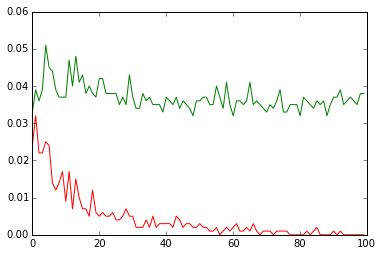

In [21]:
trainscore = list()
testscore = list()

for i in np.arange(0.01,1.01,0.01):
    clf = GBC(subsample=i)
    clf.fit(X_train, Y_train)
    trainscore.append(1-clf.score(X_train,Y_train))
    testscore.append(1-clf.score(X_test,Y_test))
    
plt.plot(trainscore,'r',label='train')
plt.plot(testscore,'g',label='test')